In [1]:
name = 'Chuck Tanner'
print(name)

Chuck Tanner


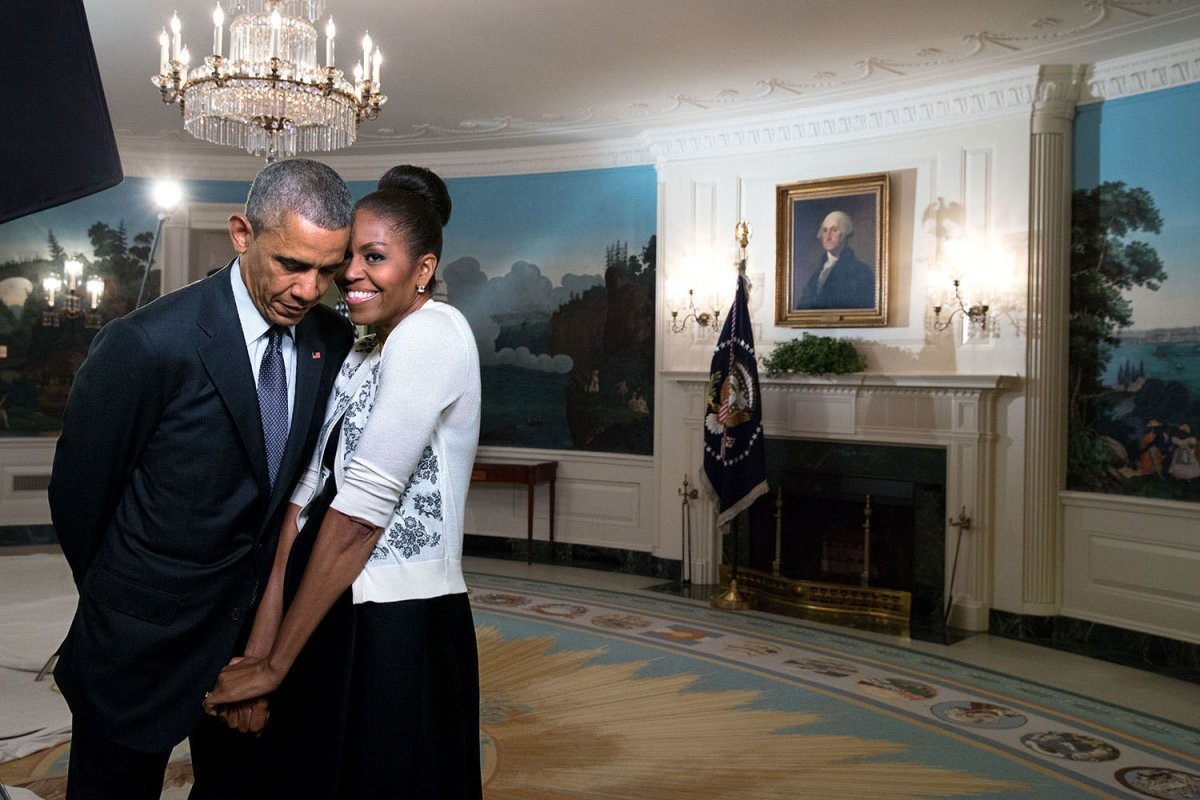

In [4]:
from IPython.display import Image

Image('https://pbs.twimg.com/media/C4otUykWcAIbSy1.jpg')

In [6]:
NAME = 'bob barker'
print(NAME)

bob barker


In [7]:
this is a markdown cell

SyntaxError: invalid syntax (<ipython-input-7-8f005470a23a>, line 1)

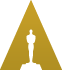

In [9]:
from IPython.display import Image
Image('https://www.oscars.org/sites/all/themes/oscar/logo.png')

In [10]:
import requests

# Pretend to be a web browser and make a get request of a webpage
oscars90_request = requests.get('https://www.oscars.org/oscars/ceremonies/2018')

# The .text returns the text from the request
oscars90_html = oscars90_request.text

# The oscars90_html is a string, we can use the common len function to ask how long the string is (in characters)
len(oscars90_html)

162091

In [12]:
print(oscars90_html[0:1000])

<!DOCTYPE html>
  <!--[if IEMobile 7]><html class="no-js ie iem7" lang="en" dir="ltr"><![endif]-->
  <!--[if lte IE 6]><html class="no-js ie lt-ie9 lt-ie8 lt-ie7" lang="en" dir="ltr"><![endif]-->
  <!--[if (IE 7)&(!IEMobile)]><html class="no-js ie lt-ie9 lt-ie8" lang="en" dir="ltr"><![endif]-->
  <!--[if IE 8]><html class="no-js ie lt-ie9" lang="en" dir="ltr"><![endif]-->
  <!--[if (gte IE 9)|(gt IEMobile 7)]><html class="no-js ie" lang="en" dir="ltr" prefix="og: http://ogp.me/ns#"><![endif]-->
  <!--[if !IE]><!--><html class="no-js" lang="en" dir="ltr" prefix="og: http://ogp.me/ns#"><!--<![endif]-->
<head>
  <meta charset="utf-8" /><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"e156b2cbb6",applicationID:"70689900"};window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var i=n[t]={exports:{}};e[t][0].call(i.exports,function(n){var i=e[t][1][n];return r(i||n)},i,i.exports)}return n[t].exports}if("function"==typeof __nr_requir

In [14]:
house_raw = requests.get('http://clerk.house.gov/xml/lists/MemberData.xml').text
print(house_raw)

<?xml version="1.0" encoding="UTF-8"?><MemberData publish-date="May 11, 2020"><title-info><congress-num>116</congress-num><congress-text>One Hundred Sixteenth Congress</congress-text><session>2</session><majority>D</majority><minority>R</minority><clerk>Cheryl L. Johnson</clerk><weburl>http://clerk.house.gov</weburl></title-info><members><member><statedistrict>AK00</statedistrict><member-info><namelist>Young, Don</namelist><bioguideID>Y000033</bioguideID><lastname>Young</lastname><firstname>Don</firstname><middlename/><sort-name>YOUNG,DON</sort-name><suffix/><courtesy>Mr.</courtesy><prior-congress>115</prior-congress><official-name>Don Young</official-name><formal-name>Mr. Young</formal-name><party>R</party><caucus>R</caucus><state postal-code="AK"><state-fullname>Alaska</state-fullname></state><district>At Large</district><townname>Fort Yukon</townname><office-building>RHOB</office-building><office-room>2314</office-room><office-zip>20515</office-zip><office-zip-suffix>0200</office-zi

In [ ]:
from bs4 import BeautifulSoup
house_soup = BeautifulSoup(house_raw, 'lxml')

In [21]:
from bs4 import BeautifulSoup
house_soup = BeautifulSoup(house_raw, 'lxml')
children = []

for tag in house_soup.findChildren():
    if tag.name not in children:
            children.append(tag.name)
            
house_soup.members.contents[0]

<member><statedistrict>AK00</statedistrict><member-info><namelist>Young, Don</namelist><bioguideid>Y000033</bioguideid><lastname>Young</lastname><firstname>Don</firstname><middlename></middlename><sort-name>YOUNG,DON</sort-name><suffix></suffix><courtesy>Mr.</courtesy><prior-congress>115</prior-congress><official-name>Don Young</official-name><formal-name>Mr. Young</formal-name><party>R</party><caucus>R</caucus><state postal-code="AK"><state-fullname>Alaska</state-fullname></state><district>At Large</district><townname>Fort Yukon</townname><office-building>RHOB</office-building><office-room>2314</office-room><office-zip>20515</office-zip><office-zip-suffix>0200</office-zip-suffix><phone>(202) 225-5765</phone><elected-date date="20181106">November  6, 2018</elected-date><sworn-date date="20190103">January  3, 2019</sworn-date></member-info><committee-assignments><committee comcode="II00" rank="2"></committee><committee comcode="PW00" rank="2"></committee><subcommittee rank="1" subcomcod

In [35]:
democrats = 0
republicans = 0
other = 0

for p in house_soup.find_all('party'):
    if p.text == "D":
        democrats += 1
    elif p.text == "R":
        republicans += 1
    else:
        other += 1
        
print("There are {0} Democrats, {1} Republicans, and {2} others in the 116th Congress.".format(democrats,republicans,other))

There are 237 Democrats, 198 Republicans, and 6 others in the 116th Congress.


In [70]:
house_soup.find_all('courtesy')
print(house_soup.find_all('courtesy'))

[<courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mrs.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Ms.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mrs.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mrs.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mrs.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Ms.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Ms.</courtesy>, <courtesy>Ms.</courtesy>, <courtesy>Ms.</courtesy>, <courtesy>Mr.</courtesy>, <courtesy>Mr.</courtesy>, <courte

In [71]:
other = 0
Mrs = 0
Ms = 0

for p in house_soup.find_all('courtesy'):    
    if p.text == "Mrs.":
        Mrs += 1
    elif p.text == "Ms.":
        Ms += 1
    else:
        other += 1

print("There are {0} Mrs. and {1} Ms.". format(Mrs, Ms))
        

There are 30 Mrs. and 73 Ms.


In [76]:


first = 0
incumbant = 0

for p in house_soup.find_all('prior-congress'):
    if p.text == "0":
        first += 1
    elif p.text == "115":
        incumbant += 1
print("there are {0} first time congress poeple and {1} reelected officials".format(first, incumbant))

there are 93 first time congress poeple and 344 reelected officials
